<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Birthweight Regression Analysis</h2><br><br>
Author: Dmitrii Aleshin<br>
<strong>Hult International Business School</strong>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Executive Summary</h3>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Based on the data studied, recommendations can be made to women on how to give birth to a healthier baby with a healthy weight:</strong><br>

 - <em>Bad habits.</em><br>Try to get rid of bad habits - cigarettes and alcoholic beverages. Consuming on average only two cigarettes a day and one drink during pregnancy will result in 190 grams of weight loss for the baby. Moreover, if you are a white woman and the child's father is also white, an additional 10 grams should be taken away. The same is true for other races, for example, Latino -6 grams.<br><br>
 - <em>Prenatal Visits.</em><br>Try to attend prenatal visits at least once every 6 weeks, but not more often than once every 3 weeks. This should be done only if indicated by a doctor! Otherwise, try not to get nervous before attending another unscheduled prenatal visit.<br><br>
 - <em>Age.</em><br>If a woman is 42 years old, try to be more attentive to health since your fertility significantly decreases from this period. The next turning point will be 49 years old when the risks of having an unhealthy baby are high enough.<br><br>
 - <em>Education.</em><br>If you live in a black family, better quality and continuing education will increase the risks for healthy childbirth due to a more responsible lifestyle.<br>
 
↓ A more detailed analysis with this evidence is presented below in four parts of the regression analysis.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part I | Importing Data, Descriptive Statistics and Missing Values</h3><br>
The analysis was carried out based on 196 observations. The dependent variable was <strong>birthweight {bwght}</strong>, and the initial set of independent variables included 17 features. These variables reflect:<br>

 - Age of the parents: <em>{mage} {fage}</em><br>
 - Parents' educational level: <em>{meduc} {feduc}</em><br>
 - Mother's bad habits - cigarettes and alcohol: <em>{cigs} {drink}</em><br>
 - Number of prenatal visits to the doctor: <em>{npvis}</em><br>
 - Month when the prenatal examination began: <em>{monpre}</em><br>
 - Race of the parents: <em>{mwhte} {mblck} {moth} {fwhte} {fblck} {foth}</em><br>
 - Gender of the child: <em>{male}</em><br>

The original data also included two tests performed in the first <em>{omaps}</em> and fifth <em>{fmaps}</em> minutes after birth. Accordingly, these data were excluded from further analysis due to the lack of a causal relationship necessary for the regression analysis.<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
After conducting additional analysis for the presence of missing values and suspicious extreme values, it was found that there are missing values for the variables of the father and mother's education, as well as in the context of the number of attended prenatal visits. Based on additional analysis, including the study of the relationship between strata by age and lifestyle, the following decisions were made:<br>

 1. replace the missing values in the variable characterizing the <strong>mother's education</strong> by the mean in her age stratum,<br> 
 2. replace the missing values in the <strong>father's education</strong> according to the same value for the mother's education variable due to the strong correlation between them,<br>
 3. replace missing values for <strong>prenatal visits</strong> according to the median value due to the lack of prerequisites for analysis by strata.<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# Installing unnecessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Excel file: birthweight_low
file = "./birthweight_low.xlsx"
data = pd.read_excel(io = file, 
                     header = 0, 
                     sheet_name = 0)

data.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
# Checking the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [3]:
# Checking the structure and dynamics of the features and dependent variable (bwght)
data.describe().round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


In [4]:
# Creating a loop detecting missing values
for col in data:
    
    # creating columns with 1s if missing and 0 if not
    if data[col].isnull().astype(int).sum() > 0:
        data['m_' + col] = data[col].isnull().astype(int)
        
# Checking the looping mechanism of detecting missing values with Sum 
data[ ['m_meduc', 'm_npvis', 'm_feduc'] ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

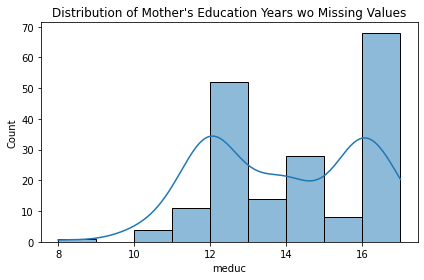

In [5]:
# Showing the distribution of MEDUC wo missing values: data_dropped
data_dropped = data.dropna()

# Displaying the plot for MEDUC wo missing values
sns.histplot(x = 'meduc',
             data = data_dropped,
             kde = True)

# Title and labels
plt.title(label = "Distribution of Mother's Education Years wo Missing Values")

# Showing the chart
plt.tight_layout()
plt.show()

In [6]:
# Showing the observations with missing values in Meduc
data.loc[:,:][data.loc[:, 'm_meduc'] == 1]

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,NaN,5,2.0,62,NaN,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
111,38,NaN,1,NaN,34,17.0,7,9,11,7,...,0,0,1,0,0,1,3610,1,1,0
114,43,NaN,1,9.0,36,NaN,8,9,5,8,...,0,0,1,0,0,1,3620,1,0,1


In [7]:
# developing a small correlation matrix
data_dropped_corr = data_dropped.corr().round(decimals = 2)


# checking the correlations of the other features with meduc
data_dropped_corr.loc['meduc',                                      # Y-variable
                     ['mage', 'monpre', 'npvis', 'fage', 'feduc',   # X-variables
                      'cigs', 'drink', 'male', 'mwhte', 'mblck',
                      'moth', 'fwhte', 'fblck', 'foth']] \
                      .sort_values(ascending = False)

feduc     0.63
moth      0.47
foth      0.46
npvis     0.14
cigs      0.09
male     -0.02
fage     -0.08
drink    -0.11
mage     -0.12
mblck    -0.18
fwhte    -0.19
fblck    -0.24
monpre   -0.25
mwhte    -0.30
Name: meduc, dtype: float64

C:\Users\AACE~1\AppData\Local\Temp/ipykernel_12024/2668310260.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_dropped_nonwhtemf = data.loc[:,:][data.loc[:, 'mwhte'] == 0][data.loc[:, 'fwhte'] == 0]


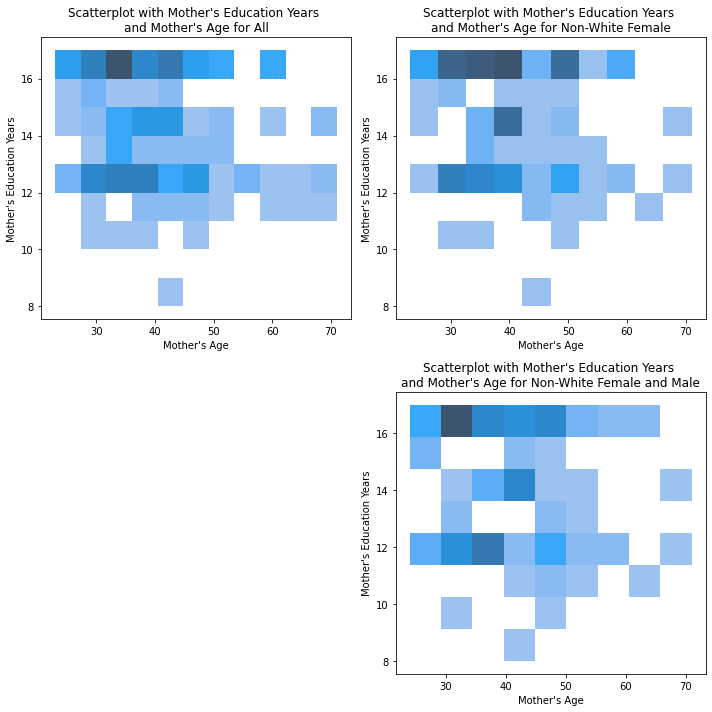

In [8]:
# developing a scatterplot for understanding correlation between mage and meduc for all and non-white female 
# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))

#-----------------------------------------------------------------------------
# first window
plt. subplot(2, 2, 1)

# Creating a chart for all
sns.histplot(x = 'mage',
             y = 'meduc',
             data = data_dropped)

# Title and labels
plt.title(label = """Scatterplot with Mother's Education Years 
and Mother's Age for All""")
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = "Mother's Education Years")

#-----------------------------------------------------------------------------
# second window
plt. subplot(2, 2, 2)

# dropping the mwhte data (where 1)
data_dropped_nonwhtem = data.loc[:,:][data.loc[:, 'mwhte'] == 0]

# Creating a chart for non-white female
sns.histplot(x = 'mage',
             y = 'meduc',
             data = data_dropped_nonwhtem)

# Title and labels
plt.title(label = """Scatterplot with Mother's Education Years 
and Mother's Age for Non-White Female""")
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = "Mother's Education Years")

#-----------------------------------------------------------------------------
# third window
plt. subplot(2, 2, 4)

# dropping the mwhte and fwhte data (where 1)
data_dropped_nonwhtemf = data.loc[:,:][data.loc[:, 'mwhte'] == 0][data.loc[:, 'fwhte'] == 0]

# Creating a chart for non-white female and non-white male
sns.histplot(x = 'mage',
             y = 'meduc',
             data = data_dropped_nonwhtemf)

# Title and labels
plt.title(label = """Scatterplot with Mother's Education Years 
and Mother's Age for Non-White Female and Male""")
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = "Mother's Education Years")

#-----------------------------------------------------------------------------
# Displaying the chart
plt.tight_layout()
plt.show()

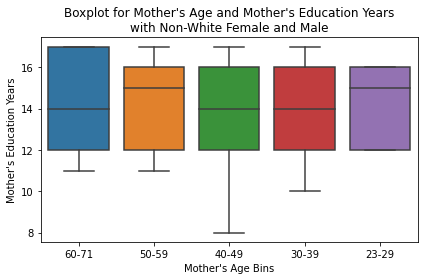

In [9]:
# creating a dummy column in the dataset for mage
data_dropped_nonwhtemf['mage_bins'] = 0

# for loop with iterrows()
for index, col in data_dropped_nonwhtemf.iterrows():
    
    # conditionals to change the values in the new column
    if data_dropped_nonwhtemf.loc[index, 'mage'] < 30:
        data_dropped_nonwhtemf.loc[index, 'mage_bins'] = '23-29' #for 23 (min)-29 years gap
        
        
    elif data_dropped_nonwhtemf.loc[index, 'mage'] < 40:
        data_dropped_nonwhtemf.loc[index, 'mage_bins'] = '30-39' #for 30-39 years gap
        
        
    elif data_dropped_nonwhtemf.loc[index, 'mage'] < 50:
        data_dropped_nonwhtemf.loc[index, 'mage_bins'] = '40-49' #for 40-49 years gap
        
    elif data_dropped_nonwhtemf.loc[index, 'mage'] < 60:
        data_dropped_nonwhtemf.loc[index, 'mage_bins'] = '50-59' #for 50-59 years gap
        
    elif data_dropped_nonwhtemf.loc[index, 'mage'] >= 60:
        data_dropped_nonwhtemf.loc[index, 'mage_bins'] = '60-71' #for 60-71(max) years gap    
    
    # safety net
    else:
        data_dropped_nonwhtemf.loc[index, 'mage_bins'] = 'error'
        
# developing a boxplot
sns.boxplot(x    = 'mage_bins',
            y    = 'meduc',
            data = data_dropped_nonwhtemf)


# titles and axis labels
plt.title(label   = """Boxplot for Mother's Age and Mother's Education Years
with Non-White Female and Male""")
plt.xlabel(xlabel = """Mother's Age Bins""")
plt.ylabel(ylabel = """Mother's Education Years""")

# displaying the plot
plt.tight_layout()
plt.show()
        

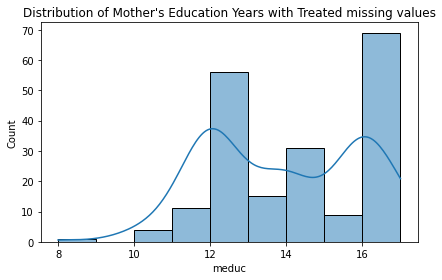

In [10]:
# Imputation value of the 14 for mising values in meduc with mage(69, 38, 43 yo) == the same median
fill_meduc = 14
data['meduc'] = data['meduc'].fillna(value = fill_meduc)

# Checking the distribution of Meduc with Treated missing values
sns.histplot(x = 'meduc',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Distribution of Mother's Education Years with Treated missing values")

# Showing the chart
plt.tight_layout()
plt.show()

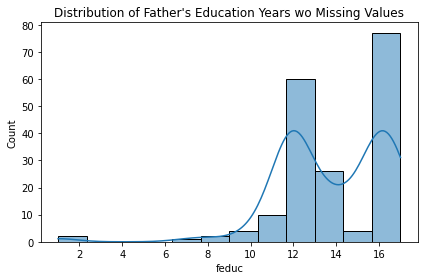

In [11]:
# Showing the distribution of FEDUC wo missing values and with Treated Meduc: data_dropped
data_dropped = data.dropna()

# Displaying the plot for MEDUC wo missing values
sns.histplot(x = 'feduc',
             data = data_dropped,
             kde = True)

# Title and labels
plt.title(label = "Distribution of Father's Education Years wo Missing Values")

# Showing the chart
plt.tight_layout()
plt.show()

In [12]:
# Showing the observations with missing values in Feduc
data.loc[:,:][data.loc[:, 'm_feduc'] == 1]

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,14.0,5,2.0,62,NaN,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
74,42,13.0,7,11.0,26,NaN,9,9,2,4,...,0,1,0,1,0,0,3170,0,0,1
99,51,17.0,6,8.0,38,NaN,8,9,17,6,...,0,1,0,0,0,1,3459,0,0,1
114,43,14.0,1,9.0,36,NaN,8,9,5,8,...,0,0,1,0,0,1,3620,1,0,1
153,37,12.0,8,5.0,40,NaN,7,9,4,0,...,0,1,0,0,0,1,3799,0,0,1
164,36,12.0,3,6.0,31,NaN,7,9,16,2,...,0,1,0,0,0,1,3900,0,0,1
191,30,12.0,5,12.0,38,NaN,5,7,3,2,...,0,1,0,0,0,1,4610,0,0,1


In [13]:
# developing a small correlation matrix
data_dropped_corr = data_dropped.corr().round(decimals = 2)


# checking the correlations of the other features with meduc
data_dropped_corr.loc['feduc',                                      # Y-variable
                     ['mage', 'monpre', 'npvis', 'fage', 'meduc',   # X-variables
                      'cigs', 'drink', 'male', 'mwhte', 'mblck',
                      'moth', 'fwhte', 'fblck', 'foth']] \
                      .sort_values(ascending = False)

meduc     0.63
foth      0.53
moth      0.52
male      0.06
cigs      0.04
npvis     0.03
fage     -0.01
mage     -0.09
mblck    -0.12
drink    -0.13
fblck    -0.14
monpre   -0.33
fwhte    -0.36
mwhte    -0.41
Name: feduc, dtype: float64

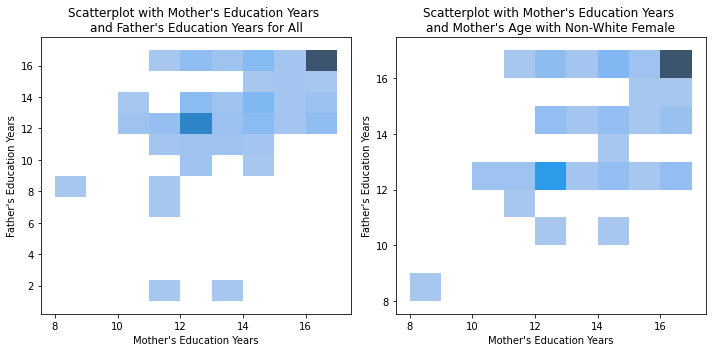

In [14]:
# developing a scatterplot for understanding correlation between meduc and feduc for all and non-white female 
# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))

#-----------------------------------------------------------------------------
# first window
plt. subplot(1, 2, 1)

# Creating a chart for all
sns.histplot(x = 'meduc',
             y = 'feduc',
             data = data_dropped)

# Title and labels
plt.title(label = """Scatterplot with Mother's Education Years 
and Father's Education Years for All""")
plt.xlabel(xlabel = "Mother's Education Years")
plt.ylabel(ylabel = "Father's Education Years")

#-----------------------------------------------------------------------------
# second window
plt. subplot(1, 2, 2)

# dropping the mwhte data (where 1)
data_dropped_nonwhtem = data.loc[:,:][data.loc[:, 'mwhte'] == 0]

# Creating a chart for non-white female
sns.histplot(x = 'meduc',
             y = 'feduc',
             data = data_dropped_nonwhtem)

# Title and labels
plt.title(label = """Scatterplot with Mother's Education Years 
and Mother's Age with Non-White Female""")
plt.xlabel(xlabel = "Mother's Education Years")
plt.ylabel(ylabel = "Father's Education Years")

#-----------------------------------------------------------------------------
# Displaying the chart
plt.tight_layout()
plt.show()


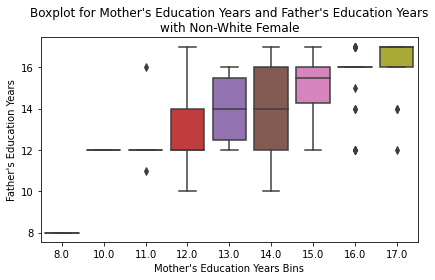

In [15]:
# developing a boxplot
sns.boxplot(x    = 'meduc',
            y    = 'feduc',
            data = data_dropped_nonwhtem)


# titles and axis labels
plt.title(label   = """Boxplot for Mother's Education Years and Father's Education Years
with Non-White Female""")
plt.xlabel(xlabel = """Mother's Education Years Bins""")
plt.ylabel(ylabel = """Father's Education Years""")

# displaying the plot
plt.tight_layout()
plt.show()
        

In [16]:
# Imputation value of the EXACTLY SAME EDUCATION YEARS for mising values in feduc as well as in MEDUC
data.loc[:, ['meduc','feduc']] = data.loc[:, ['meduc','feduc']].fillna(axis = 1, method = 'ffill')

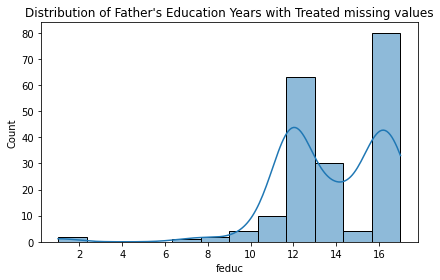

In [17]:
# Checking the distribution of Meduc with Treated missing values
sns.histplot(x = 'feduc',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Distribution of Father's Education Years with Treated missing values")

# Showing the chart
plt.tight_layout()
plt.show()

In [18]:
# Showing the observations with missing values in Npvis
data.loc[:,:][data.loc[:, 'm_npvis'] == 1]

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
73,47,15.0,2,NaN,39,17.0,9,9,19,7,...,0,0,1,0,0,1,3170,0,1,0
111,38,14.0,1,NaN,34,17.0,7,9,11,7,...,0,0,1,0,0,1,3610,1,1,0
185,38,12.0,2,NaN,32,14.0,9,9,13,0,...,0,1,0,0,1,0,4210,0,1,0


In [19]:
# Treat the missing values in Npvis with the median because there is no reason for using strata with other features
npvis_median = data['npvis'].median()

# Imputing the median
data['npvis'].fillna(value = npvis_median, inplace = True) 

In [20]:
# Checking the missing values
data.isnull().any().any()

False

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part II | Basic OLS Model</h3><br>
We obtained all the necessary data at the previous stage to make the first basic model for further improvement, based on R^2. The first results are presented below:<br>
<pre>                          
                          OLS Regression Results
==============================================================================
Dep. Variable:                  bwght   R-squared:                       <strong>0.717</strong>
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     35.46
Date:                                   Prob (F-statistic):           5.41e-43
Time:                                   Log-Likelihood:                -1422.4
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     182   BIC:                             2919.
Df Model:                          13                                                                               
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2716.8288    176.091     15.429      0.000    2369.386    3064.271
mage         -11.4541      3.257     -3.516      0.001     -17.881      -5.027
meduc         17.4186     17.106      1.018      <strong>0.310</strong>     -16.334      51.171
monpre         3.1504     22.543      0.140      <strong>0.889</strong>     -41.329      47.630
npvis          2.6734      6.566      0.407      <strong>0.684</strong>     -10.281      15.628
fage          -5.1292      3.568     -1.438      <strong>0.152</strong>     -12.168       1.910
feduc         14.7293     14.477      1.017      <strong>0.310</strong>     -13.835      43.293
cigs         -36.4592      4.632     -7.871      0.000     -45.599     -27.320
drink       -114.6311      9.832    -11.659      0.000    -134.031     -95.232
male          14.1248     52.712      0.268      <strong>0.789</strong>     -89.881     118.130
mwhte        980.9399     90.111     10.886      0.000     803.144    1158.736
mblck        837.2292    103.585      8.083      0.000     632.848    1041.611
moth         898.6596     93.838      9.577      0.000     713.509    1083.810
fwhte        852.7100     88.071      9.682      0.000     678.938    1026.482
fblck        988.2860     94.876     10.417      0.000     801.088    1175.484
foth         875.8327    103.286      8.480      0.000     672.040    1079.625
</pre>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
As can be seen from the presented results, we achieved a reasonably good baseline value of 71.7% R-squared. However, we can also note the presence of factors that do not make sense for interpretation. <br><br>
By 95% CI, we can talk about a positive or negative relationship or the absence of dependence between the independent dependent variables.Examples of such variables are (1) the number of years of education of the mother, (2) the number of prenatal visits attended, (3) the month of the first visit to the doctor, (4) the age and education of the father, and (5) the gender of the child. <br><br>At first glance, it seems that some of the variables directly related to the course of pregnancy should directly affect the newborn baby's weight. In this regard, it was decided to continue further studying the variables to study their skewness and other characteristics.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [21]:
# Importing the package for modeling
import statsmodels.formula.api as smf

# Creating a base model with all applicable features
lm_practice = smf.ols(formula = """bwght ~ mage
                                           + meduc
                                           + monpre
                                           + npvis
                                           + fage
                                           + feduc
                                           + cigs
                                           + drink
                                           + male
                                           + mwhte
                                           + mblck
                                           + moth
                                           + fwhte
                                           + fblck
                                           + foth""",
                                           data = data)

# Displaying the result
results = lm_practice.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     35.46
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.41e-43
Time:                        19:42:50   Log-Likelihood:                -1422.4
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     182   BIC:                             2919.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2716.8288    176.091     15.429      0.0

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part III | Feature Engineering</h3><br>

<strong>Dependent variable:</strong><br>

- <em>Birthweight</em><br>
The distribution of the values of this variable was investigated, and it was found that it has positive skewness. However, no extreme values were found. Thus, to make the distribution more regular, it was decided to investigate the square form of the dependent variable, which can reduce the skewness for acceptable values. However, a logarithmic variable was also created if the other variables have corresponding negative skewness and will be more correlated with this particular variable.<br><br>

<strong>Independent Variables:</strong><br>

- <em>Mother's Age</em><br>
An analysis was carried out, which found that the critical moment for the women represented in this dataset is <strong>42 years</strong>. As women reach this age, fertility declines significantly, increasing the risk of unhealthy baby weight.<br>
In addition, fertility also changes even further by <strong>49 years</strong>, increasing the risks of a healthy pregnancy and healthy baby weight. The most significant correlation was found precisely by these age boundaries, which allows us to draw appropriate conclusions. It should be noted that the corresponding strata will enable one to make the following conclusions since there are more than 30 observations:<br>

<pre>
Strata size with threshold of 42 yo

# of Women under 42 years old:    121
# of Women 42 years old or over:  75
------------------------------------

Strata size with threshold of 49 yo

# of Women under 49 years old:    161
# of Women 49 years old or over:  35
</pre>

- <em>Father's Age</em><br>
Having done a similar algorithm, the exact opposite was found with the father's age. At 39, a child is more likely to be at a healthier weight than before that age. A possible reason for this may be the higher income and convenience it can provide for the family. <br>
However, due to the relationship between the mother's age and the father, age 42 is also the boundary when the child will be lighter.<br><br>

- <em>First month and # of prenatal visits</em><br>
We found out at the previous stage that these variables do not make sense individually. Still, together they become a very significant indicator. The analysis showed that <strong>the frequency of doctor visits is quite an essential factor</strong>. It is calculated as the number of months before the baby is born (assuming that the baby will be born in the 9th month of pregnancy) divided by the number of prenatal visits attended. Thus, we get an indicator characterizing the average time between visited visits.<br>
It should be noted that the most substantial influence of this factor occurs in the presence of a quadratic function. This means that trekking too infrequent or too frequent - likely due to identified problems - will signal risks to the child's healthy weight.<br><br>

- <em>Cigarettes</em><br>
Cigarettes themselves, like alcohol, are the most significant factor affecting a child's weight. The inverse relationship demonstrates the detriment of such habits for the child.<br>
However, an interesting point is that the number of cigarettes in white families, where mom and dad are white, will exacerbate the risks to the child's healthy weight more than in black families. A possible interpretation of this could be, for example, different types of tobacco used.<br><br>

- <em>Education</em><br>
Education itself has no effect on a child's weight based on the data presented. However, consider the average number of years of schooling between father and mother and apply this to families of different races. It turns out that a more educated black family has a higher chance of having a healthy child.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

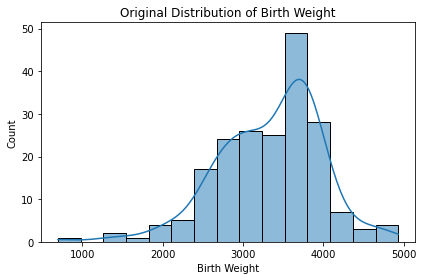

In [22]:
# Analysis of the Dependent variable
# Developing a histogram for y-variable
sns.histplot(x = 'bwght',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight")
plt.ylabel(ylabel = "Count")

# Displaying the histogram
plt.tight_layout()
plt.show()

In [23]:
# Creating a squared y-variable
data['sq_bwght'] = data['bwght'] ** 2

# Creating a log y-variable
data['log_bwght'] = np.log(data['bwght'])

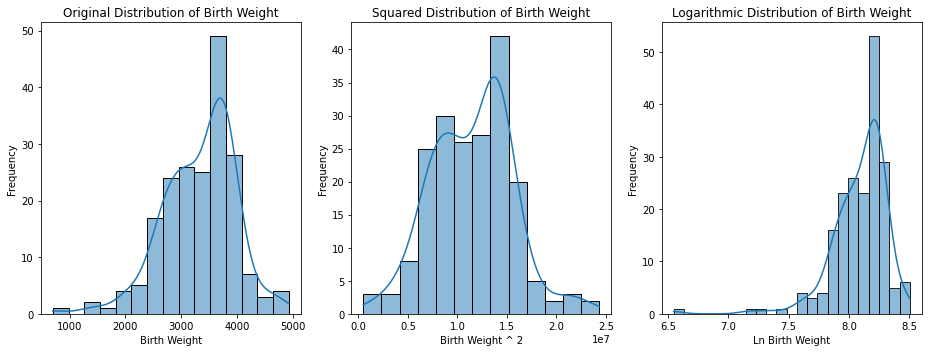

In [24]:
# Comparing the histograms for y-variable
fig, ax = plt.subplots(figsize = (13, 5))

#-----------------------------------------------------------------------------
# first window
plt.subplot(1, 3, 1)

# Developing the histogram of the original data
sns.histplot(x = 'bwght',
             data = data,
             kde = True)

# Title and label
plt.title(label = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight")
plt.ylabel(ylabel = "Frequency")

#-----------------------------------------------------------------------------
# second window
plt.subplot(1, 3, 2)

# Developing the histogram of the squared data
sns.histplot(x = 'sq_bwght',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Squared Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight ^ 2")
plt.ylabel(ylabel = "Frequency")

#-----------------------------------------------------------------------------
# third window
plt.subplot(1, 3, 3)

# Developing the histogram of the natural logarithmic data
sns.histplot(x = 'log_bwght',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Logarithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Ln Birth Weight")
plt.ylabel(ylabel = "Frequency")

#-----------------------------------------------------------------------------
# Displaying the chart
plt.tight_layout()
plt.show()

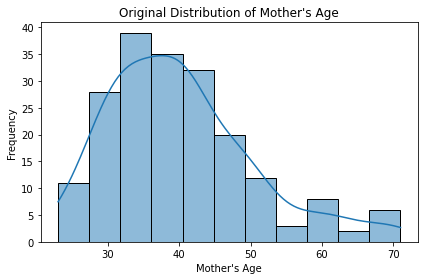

In [25]:
# Analysis of the Mother's Age feature

# Developing a histogram
sns.histplot(x = 'mage',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Original Distribution of Mother's Age")
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = "Frequency")

# Displaying the chart
plt.tight_layout()
plt.show()

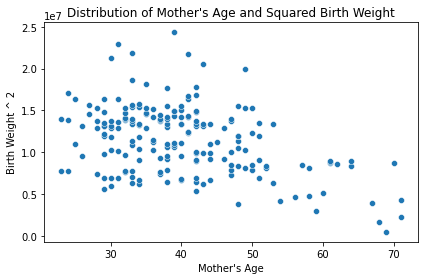

In [26]:
# Checking the distribution of Mother's Age and Squared Birth Weight
# Developing the scatterplot
sns.scatterplot(x = 'mage',
                y = 'sq_bwght',
                data = data)

# Title and labels
plt.title(label = "Distribution of Mother's Age and Squared Birth Weight")
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = "Birth Weight ^ 2")

# Displaying the chart
plt.tight_layout()
plt.show()


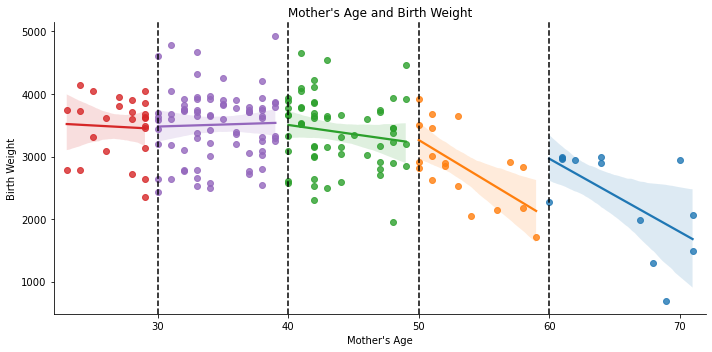

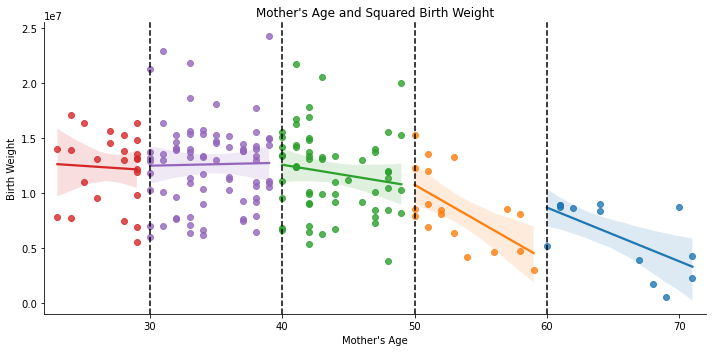

In [27]:
# creating a dummy column in the original DataFrame
data['mage_bins'] = 0


# for loop with iterrows() 
for index, col in data.iterrows():
    
    
    # conditionals to change the values in the new column
    if data.loc[index, 'mage'] < 30:
        data.loc[index, 'mage_bins'] = '[23 - 30)'
        
        
    elif data.loc[index, 'mage'] < 40:
        data.loc[index, 'mage_bins'] = '[30 - 40)'
        
        
    elif data.loc[index, 'mage'] < 50:
        data.loc[index, 'mage_bins'] = '[40 - 50)'
        
        
    elif data.loc[index, 'mage'] < 60:
        data.loc[index, 'mage_bins'] = '[50 - 60)'
        
        
    elif data.loc[index, 'mage'] >= 60: # this is where the bug was
        data.loc[index, 'mage_bins'] = '[60 - 71]'
    
    
    # safety net
    else:
        data.loc[index, 'mage_bins'] = 'error'
        
# Developing lmplots for bwght/sq_bwght and mage

#-----------------------------------------------------------------------------
# first chart
# instantiating an lmplot for bwght
sns.lmplot(x          = 'mage',  
           y          = 'bwght',  
           hue        = 'mage_bins', # categorical data for subsets
           legend     = False,        # supressing the legend   
           scatter    = True,     
           fit_reg    = True,     
           aspect     = 2,        
           data       = data)


# developing vertical axis lines
value = 30

while value < 70:
    
    # making a vertical line
    plt.axvline(x = value, color = "black", linestyle = '--')
    
    # incrementing value in one-quarter increments
    value += 10

# formatting and displaying the plot
plt.title(label    = "Mother's Age and Birth Weight")
plt.xlabel(xlabel  = "Mother's Age")
plt.ylabel(ylabel  = 'Birth Weight')
plt.xlim(22, 72)

# Displaying the chart
plt.tight_layout()
plt.savefig('./mage_bwght_scatter.png')
plt.show()
#-----------------------------------------------------------------------------
# second chart

# instantiating an lmplot for squared bwght
sns.lmplot(x          = 'mage',  
           y          = 'sq_bwght',  
           hue        = 'mage_bins', # categorical data for subsets
           legend     = False,        # supressing the legend    
           scatter    = True,     
           fit_reg    = True,     
           aspect     = 2,        
           data       = data)


# developing vertical axis lines
value = 30

while value < 70:
    
    # making a vertical line
    plt.axvline(x = value, color = "black", linestyle = '--')
    
    # incrementing value in one-quarter increments
    value += 10

# formatting and displaying the plot
plt.title(label    = "Mother's Age and Squared Birth Weight")
plt.xlabel(xlabel  = "Mother's Age")
plt.ylabel(ylabel  = 'Birth Weight')
plt.xlim(22, 72)

# Displaying the chart
plt.tight_layout()
plt.savefig('./mage_sqbwght_scatter.png')
plt.show()

In [28]:
# Creating a list of possible years-old changing the tendency
threshold_yo = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32,\
                33, 34, 35, 36, 37, 38, 39, 40, 41, 42,\
                43, 44, 45, 46, 47, 48, 49, 50, 51]

# loop for series of yo
for num in threshold_yo:
    name = "mage_bins_" + str(num)
    data[name] = 0
    
    # for loop with iterrows()
    for index, col in data.iterrows():
        
        # conditionals to change the values in the column
        if data.loc[index, 'mage'] < num:
            data.loc[index, name] = 'LessThreshold'
            
        elif data.loc[index, 'mage'] >= num:
            data.loc[index, name] = 'MoreEqThreshold'
            
        #safety net
        else:
            data.loc[index, name] = 'error'      
    

In [29]:
# Creating a list of possible years-old changing the tendency
threshold_yo_corr = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
l = []
m = []

# loop for series of yo
for num in threshold_yo_corr:
    name = "mage_bins_" + str(num)

    # Dividing the dataset according to created looped bins (less than threshold)
    l.append(data.loc[:, ['mage', 'bwght', 'sq_bwght']]\
                         [data.loc[:, name] == 'LessThreshold']\
                         .corr(method = 'pearson').round(decimals = 2))

    # Dividing the dataset according to created looped bins (more or equal threshold)
    m.append(data.loc[:, ['mage', 'bwght', 'sq_bwght']]\
                         [data.loc[:, name] == 'MoreEqThreshold']\
                         .corr(method = 'pearson').round(decimals = 2))

In [30]:
# Creating the table with correlations of the sub-datasets before threshold years 
# and after for checking the fair threshold

print(f"""
Threshold of the Mother's Age        |   35   |   36   |   37   |   38   |   39   |   40   |   41   |
-----------------------------------------------------------------------------------------------------
Original Birth Weight:
Correlation Before threshold         |  {l[0].loc['mage', 'bwght']} |   {l[1].loc['mage', 'bwght']} |   {l[2].loc['mage', 'bwght']} |   {l[3].loc['mage', 'bwght']} |  {l[4].loc['mage', 'bwght']} |   {l[5].loc['mage', 'bwght']} |   {l[6].loc['mage', 'bwght']} |
Correlation After  threshold         |  {m[0].loc['mage', 'bwght']}  |  {m[1].loc['mage', 'bwght']} |  {m[2].loc['mage', 'bwght']} |  {m[3].loc['mage', 'bwght']}  |  {m[4].loc['mage', 'bwght']} |  {m[5].loc['mage', 'bwght']} |  {m[6].loc['mage', 'bwght']} |
Absolute Sum of the Correlations =>  |   {abs(l[0].loc['mage', 'bwght']) + abs(m[0].loc['mage', 'bwght'])} |   {abs(l[1].loc['mage', 'bwght']) + abs(m[1].loc['mage', 'bwght'])} |   {abs(l[2].loc['mage', 'bwght']) + abs(m[2].loc['mage', 'bwght'])} |   {abs(l[3].loc['mage', 'bwght']) + abs(m[3].loc['mage', 'bwght'])} |   {abs(l[4].loc['mage', 'bwght']) + abs(m[4].loc['mage', 'bwght'])} |   {abs(l[5].loc['mage', 'bwght']) + abs(m[5].loc['mage', 'bwght'])} |   {abs(l[6].loc['mage', 'bwght']) + abs(m[6].loc['mage', 'bwght'])} |
-----------------------------------------------------------------------------------------------------
Squared Birth Weight:
Correlation Before threshold         |  {l[0].loc['mage', 'sq_bwght']} |   {l[1].loc['mage', 'sq_bwght']} |   {l[2].loc['mage', 'sq_bwght']} |   {l[3].loc['mage', 'sq_bwght']}  |  {l[4].loc['mage', 'sq_bwght']} |   {l[5].loc['mage', 'sq_bwght']} |   {l[6].loc['mage', 'sq_bwght']}  |
Correlation After  threshold         |  {m[0].loc['mage', 'sq_bwght']} |  {m[1].loc['mage', 'sq_bwght']} |  {m[2].loc['mage', 'sq_bwght']} |  {m[3].loc['mage', 'sq_bwght']} |  {m[4].loc['mage', 'sq_bwght']} |  {m[5].loc['mage', 'sq_bwght']} |  {m[6].loc['mage', 'sq_bwght']} |
Absolute Sum of the Correlations =>  |   {(abs(l[0].loc['mage', 'sq_bwght']) + abs(m[0].loc['mage', 'sq_bwght'])).round(2)} |   {(abs(l[1].loc['mage', 'sq_bwght']) + abs(m[1].loc['mage', 'sq_bwght'])).round(2)} |   {(abs(l[2].loc['mage', 'sq_bwght']) + abs(m[2].loc['mage', 'sq_bwght'])).round(2)} |   {abs(l[3].loc['mage', 'sq_bwght']) + abs(m[3].loc['mage', 'sq_bwght'])} |   {abs(l[4].loc['mage', 'sq_bwght']) + abs(m[4].loc['mage', 'sq_bwght'])} |   {abs(l[5].loc['mage', 'sq_bwght']) + abs(m[5].loc['mage', 'sq_bwght'])}  |   {abs(l[6].loc['mage', 'sq_bwght']) + abs(m[6].loc['mage', 'sq_bwght'])} |



Threshold of the Mother's Age        |   42   |   43   |   44   |   45   |   46   |   47   |   48   |
-----------------------------------------------------------------------------------------------------
Original Birth Weight:
Correlation Before threshold         |   {l[7].loc['mage', 'bwght']} |   {l[8].loc['mage', 'bwght']} |   {l[9].loc['mage', 'bwght']} |  {l[10].loc['mage', 'bwght']} |  {l[11].loc['mage', 'bwght']} |  {l[12].loc['mage', 'bwght']} |  {l[13].loc['mage', 'bwght']} |
Correlation After  threshold         |  {m[7].loc['mage', 'bwght']} |  {m[8].loc['mage', 'bwght']} |  {m[9].loc['mage', 'bwght']} |  {m[10].loc['mage', 'bwght']} |  {m[11].loc['mage', 'bwght']} |  {m[12].loc['mage', 'bwght']} |  {m[13].loc['mage', 'bwght']} |
Absolute Sum of the Correlations =>  |   {(abs(l[7].loc['mage', 'bwght']) + abs(m[7].loc['mage', 'bwght'])).round(2)} |   {abs(l[8].loc['mage', 'bwght']) + abs(m[8].loc['mage', 'bwght'])} |   {abs(l[9].loc['mage', 'bwght']) + abs(m[9].loc['mage', 'bwght'])} |   {abs(l[10].loc['mage', 'bwght']) + abs(m[10].loc['mage', 'bwght'])} |   {abs(l[11].loc['mage', 'bwght']) + abs(m[11].loc['mage', 'bwght'])} |   {abs(l[12].loc['mage', 'bwght']) + abs(m[12].loc['mage', 'bwght'])} |   {abs(l[13].loc['mage', 'bwght']) + abs(m[13].loc['mage', 'bwght'])}  |
-----------------------------------------------------------------------------------------------------
Squared Birth Weight:
Correlation Before threshold         |   {l[7].loc['mage', 'sq_bwght']} |   {l[8].loc['mage', 'sq_bwght']} |   {l[9].loc['mage', 'sq_bwght']} |  {l[10].loc['mage', 'sq_bwght']} |  {l[11].loc['mage', 'sq_bwght']} |  {l[12].loc['mage', 'sq_bwght']} |  {l[13].loc['mage', 'sq_bwght']} |
Correlation After  threshold         |  {m[7].loc['mage', 'sq_bwght']} |  {m[8].loc['mage', 'sq_bwght']} |  {m[9].loc['mage', 'sq_bwght']} |  {m[10].loc['mage', 'sq_bwght']}  |  {m[11].loc['mage', 'sq_bwght']} |  {m[12].loc['mage', 'sq_bwght']} |  {m[13].loc['mage', 'sq_bwght']} |
Absolute Sum of the Correlations =>  |   {(abs(l[7].loc['mage', 'sq_bwght']) + abs(m[7].loc['mage', 'sq_bwght'])).round(2)} |   {(abs(l[8].loc['mage', 'sq_bwght']) + abs(m[8].loc['mage', 'sq_bwght'])).round(2)}  |   {(abs(l[9].loc['mage', 'sq_bwght']) + abs(m[9].loc['mage', 'sq_bwght'])).round(2)} |   {abs(l[10].loc['mage', 'sq_bwght']) + abs(m[10].loc['mage', 'sq_bwght'])} |   {abs(l[11].loc['mage', 'sq_bwght']) + abs(m[11].loc['mage', 'sq_bwght'])} |   {abs(l[12].loc['mage', 'sq_bwght']) + abs(m[12].loc['mage', 'sq_bwght'])} |   {(abs(l[13].loc['mage', 'sq_bwght']) + abs(m[13].loc['mage', 'sq_bwght'])).round(2)} |



Threshold of the Mother's Age        |   49   |   50   |   51   |   
-----------------------------------------------------------------------------------------------------
Original Birth Weight:
Correlation Before threshold         |  {l[14].loc['mage', 'bwght']} |  {l[15].loc['mage', 'bwght']} |  {l[16].loc['mage', 'bwght']}  |
Correlation After  threshold         |  {m[14].loc['mage', 'bwght']} |  {m[15].loc['mage', 'bwght']} |  {m[16].loc['mage', 'bwght']} |
Absolute Sum of the Correlations =>  |   {(abs(l[14].loc['mage', 'bwght']) + abs(m[14].loc['mage', 'bwght'])).round(2)} |   {abs(l[15].loc['mage', 'bwght']) + abs(m[15].loc['mage', 'bwght'])}  |   {abs(l[16].loc['mage', 'bwght']) + abs(m[16].loc['mage', 'bwght'])} |
-----------------------------------------------------------------------------------------------------
Squared Birth Weight:
Correlation Before threshold         |  {l[14].loc['mage', 'sq_bwght']} |  {l[15].loc['mage', 'sq_bwght']} |  {l[16].loc['mage', 'sq_bwght']}  |  
Correlation After  threshold         |  {m[14].loc['mage', 'sq_bwght']} |  {m[15].loc['mage', 'sq_bwght']}  |  {m[16].loc['mage', 'sq_bwght']} |  
Absolute Sum of the Correlations =>  |   {(abs(l[14].loc['mage', 'sq_bwght']) + abs(m[14].loc['mage', 'sq_bwght'])).round(2)} |   {(abs(l[15].loc['mage', 'sq_bwght']) + abs(m[15].loc['mage', 'sq_bwght'])).round(2)} |   {(abs(l[16].loc['mage', 'sq_bwght']) + abs(m[16].loc['mage', 'sq_bwght'])).round(2)} |   

""")
    


Threshold of the Mother's Age        |   35   |   36   |   37   |   38   |   39   |   40   |   41   |
-----------------------------------------------------------------------------------------------------
Original Birth Weight:
Correlation Before threshold         |  -0.03 |   0.05 |   0.05 |   0.01 |  -0.02 |   0.03 |   0.01 |
Correlation After  threshold         |  -0.6  |  -0.58 |  -0.58 |  -0.6  |  -0.62 |  -0.61 |  -0.63 |
Absolute Sum of the Correlations =>  |   0.63 |   0.63 |   0.63 |   0.61 |   0.64 |   0.64 |   0.64 |
-----------------------------------------------------------------------------------------------------
Squared Birth Weight:
Correlation Before threshold         |  -0.02 |   0.05 |   0.05 |   0.0  |  -0.03 |   0.03 |   0.0  |
Correlation After  threshold         |  -0.55 |  -0.54 |  -0.54 |  -0.55 |  -0.58 |  -0.57 |  -0.59 |
Absolute Sum of the Correlations =>  |   0.57 |   0.59 |   0.59 |   0.55 |   0.61 |   0.6  |   0.59 |



Threshold of the Mother's Age    

In [31]:
# Checking the size of strata with threshold of 42 yo (0.67) and 49 yo (0.76)
print(f"""
Strata size with threshold of 42 yo

# of Women under 42 years old:    {data['mage_bins_42'].value_counts()[0]}
# of Women 42 years old or over:  {data['mage_bins_42'].value_counts()[1]}
------------------------------------

Strata size with threshold of 49 yo

# of Women under 49 years old:    {data['mage_bins_49'].value_counts()[0]}
# of Women 49 years old or over:  {data['mage_bins_49'].value_counts()[1]}""")


Strata size with threshold of 42 yo

# of Women under 42 years old:    121
# of Women 42 years old or over:  75
------------------------------------

Strata size with threshold of 49 yo

# of Women under 49 years old:    161
# of Women 49 years old or over:  35


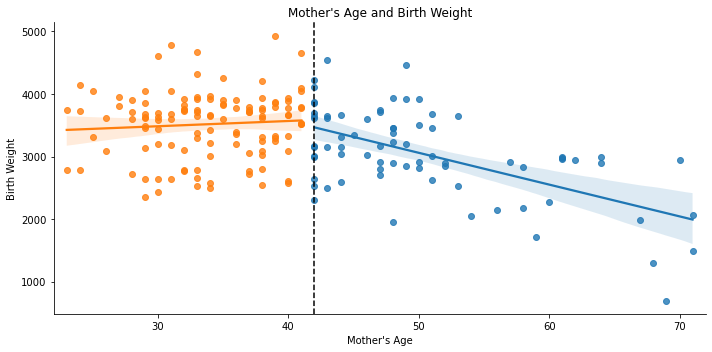

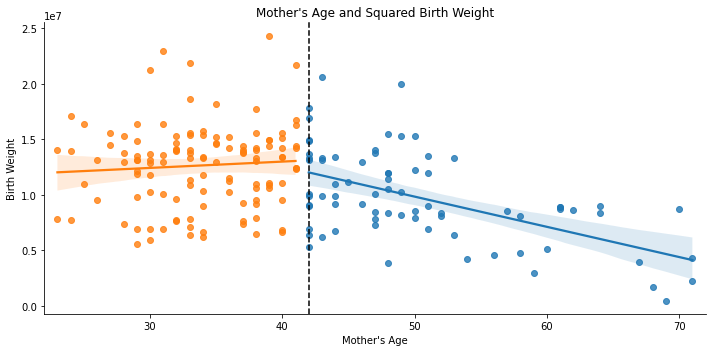

In [32]:
# instantiating an lmplot for bwght
sns.lmplot(x          = 'mage',  
           y          = 'bwght',  
           hue        = 'mage_bins_42', # categorical data for subsets
           legend     = False,        # supressing the legend   
           scatter    = True,     
           fit_reg    = True,     
           aspect     = 2,        
           data       = data)


# developing vertical axis lines
plt.axvline(x = 42, color = "black", linestyle = '--')

# formatting and displaying the plot
plt.title(label    = "Mother's Age and Birth Weight")
plt.xlabel(xlabel  = "Mother's Age")
plt.ylabel(ylabel  = 'Birth Weight')
plt.xlim(22, 72)

# Displaying the chart
plt.tight_layout()
plt.savefig('./mage_bwght_scatter.png')
plt.show()
#-----------------------------------------------------------------------------
# second chart

# instantiating an lmplot for squared bwght
sns.lmplot(x          = 'mage',  
           y          = 'sq_bwght',  
           hue        = 'mage_bins_42', # categorical data for subsets
           legend     = False,        # supressing the legend    
           scatter    = True,     
           fit_reg    = True,     
           aspect     = 2,        
           data       = data)

# developing vertical axis lines
plt.axvline(x = 42, color = "black", linestyle = '--')

# formatting and displaying the plot
plt.title(label    = "Mother's Age and Squared Birth Weight")
plt.xlabel(xlabel  = "Mother's Age")
plt.ylabel(ylabel  = 'Birth Weight')
plt.xlim(22, 72)

# Displaying the chart
plt.tight_layout()
plt.savefig('./mage_sqbwght_scatter.png')
plt.show()

In [33]:
# Making a dummy variable for mother's with age more/equal or less than 42 
# data['mage_bins_42'] = [1 if i == 'LessThreshold' else 0 for i in data['mage_bins_42']]

for num in threshold_yo:
    name = 'mage_bins_' + str(num)
    data[name] = [1 if i == 'LessThreshold' else 0 for i in data[name]]

# Checking the result 
data['mage_bins_42'].value_counts()

1    121
0     75
Name: mage_bins_42, dtype: int64

In [34]:
# Creating an interaction with a defined threshold
#data['mage_x_mage42'] = data['mage'] * data['mage_bins_42']

for num in threshold_yo:
    name_0 = 'mage_bins_' + str(num)
    name = 'mage_x_mage' + str(num)
    data[name] = data['mage'] * data[name_0]

In [35]:
# Creating a list of possible years-old changing the tendency
threshold_yo_f = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32,\
                33, 34, 35, 36, 37, 38, 39, 40, 41, 42,\
                43, 44, 45, 46, 47, 48, 49, 50, 51]

# loop for series of yo
for num in threshold_yo_f:
    name = "fage_bins_" + str(num)
    data[name] = 0
    
    # for loop with iterrows()
    for index, col in data.iterrows():
        
        # conditionals to change the values in the column
        if data.loc[index, 'fage'] < num:
            data.loc[index, name] = 'LessThreshold'
            
        elif data.loc[index, 'fage'] >= num:
            data.loc[index, name] = 'MoreEqThreshold'
            
        #safety net
        else:
            data.loc[index, name] = 'error'      
    
# Creating a list of possible years-old changing the tendency
threshold_yo_f_corr = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
l = []
m = []

# loop for series of yo
for num in threshold_yo_f_corr:
    name = "fage_bins_" + str(num)

    # Dividing the dataset according to created looped bins (less than threshold)
    l.append(data.loc[:, ['fage', 'bwght', 'sq_bwght']]\
                         [data.loc[:, name] == 'LessThreshold']\
                         .corr(method = 'pearson').round(decimals = 2))

    # Dividing the dataset according to created looped bins (more or equal threshold)
    m.append(data.loc[:, ['fage', 'bwght', 'sq_bwght']]\
                         [data.loc[:, name] == 'MoreEqThreshold']\
                         .corr(method = 'pearson').round(decimals = 2))
    
for num in threshold_yo_f:
    name = 'fage_bins_' + str(num)
    data[name] = [1 if i == 'LessThreshold' else 0 for i in data[name]]
    
for num in threshold_yo_f:
    name_0 = 'fage_bins_' + str(num)
    name = 'fage_x_fage' + str(num)
    data[name] = data['fage'] * data[name_0]

In [36]:
# Creating a list of possible years-old changing the tendency
threshold_yo_rev = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32,\
                33, 34, 35, 36, 37, 38, 39, 40, 41, 42,\
                43, 44, 45, 46, 47, 48, 49, 50, 51]

# loop for series of yo
for num in threshold_yo_rev:
    name = "mage_bins_rev_" + str(num)
    data[name] = 0
    
    # for loop with iterrows()
    for index, col in data.iterrows():
        
        # conditionals to change the values in the column
        if data.loc[index, 'mage'] < num:
            data.loc[index, name] = 'LessThreshold'
            
        elif data.loc[index, 'mage'] >= num:
            data.loc[index, name] = 'MoreEqThreshold'
            
        #safety net
        else:
            data.loc[index, name] = 'error'      
    
# Creating a list of possible years-old changing the tendency
l = []
m = []
    
for num in threshold_yo_rev:
    name = 'mage_bins_rev_' + str(num)
    data[name] = [0 if i == 'LessThreshold' else 1 for i in data[name]]
    
for num in threshold_yo_rev:
    name_0 = 'mage_bins_rev_' + str(num)
    name = 'mage_x_mage_rev_' + str(num)
    data[name] = data['mage'] * data[name_0]

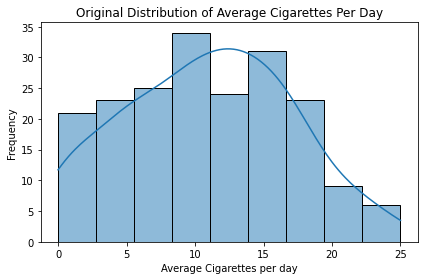

In [37]:
# Analysis of the Cigs feature

# Developing a histogram
sns.histplot(x = 'cigs',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Original Distribution of Average Cigarettes Per Day")
plt.xlabel(xlabel = "Average Cigarettes per day")
plt.ylabel(ylabel = "Frequency")

# Displaying the chart
plt.tight_layout()
plt.show()

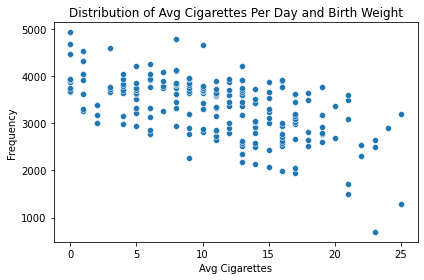

In [38]:
# Checking the scatterplot of Avg Cigarettes per day and Birth Weight
sns.scatterplot(x = 'cigs',
                y = 'bwght',
               data = data)

# Title and Labels
plt.title(label = "Distribution of Avg Cigarettes Per Day and Birth Weight")
plt.xlabel(xlabel = "Avg Cigarettes")
plt.ylabel(ylabel = "Frequency")

# Displaying the chart
plt.tight_layout()
plt.show()

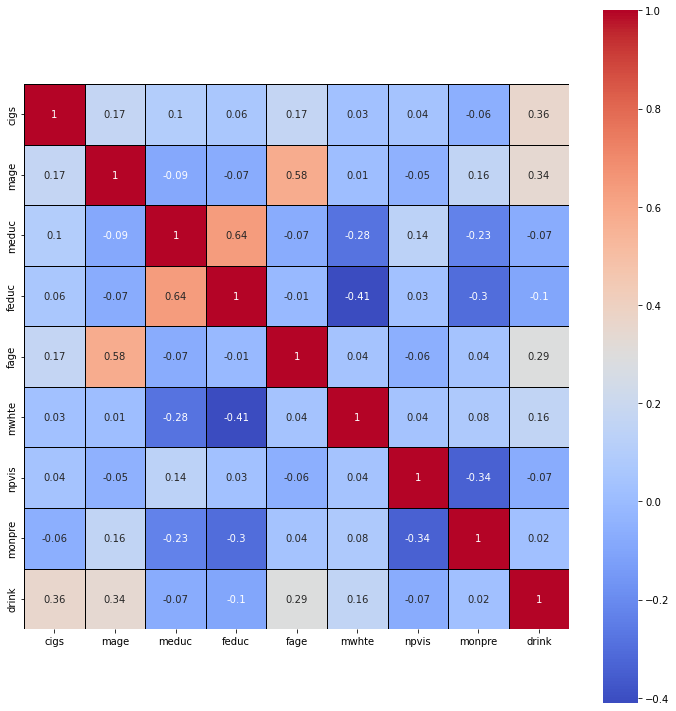

In [39]:
# Checking the correlation of features
cigs_corr = data.loc[:, ['cigs', 'mage', 'meduc', 'feduc', 'fage', \
                         'mwhte', 'npvis', 'monpre', 'drink']]\
                        .corr(method = 'pearson').round(decimals = 2)

# Creating a heatmap for the correlation analysis
fig, ax = plt.subplots(figsize = (10, 10))                       
sns.heatmap(cigs_corr, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

# Displaying the chart
plt.tight_layout()
plt.show()

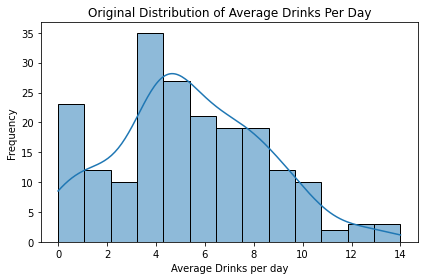

In [40]:
# Analysis of the Drink feature

# Developing a histogram
sns.histplot(x = 'drink',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Original Distribution of Average Drinks Per Day")
plt.xlabel(xlabel = "Average Drinks per day")
plt.ylabel(ylabel = "Frequency")

# Displaying the chart
plt.tight_layout()
plt.show()

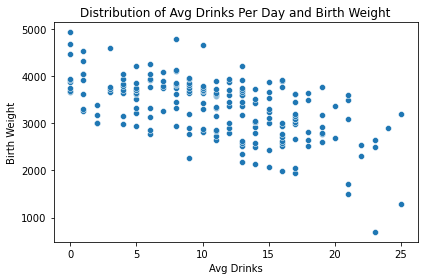

In [41]:
# Checking the scatterplot of Avg Cigarettes per day and Birth Weight
sns.scatterplot(x = 'cigs',
                y = 'bwght',
               data = data)

# Title and Labels
plt.title(label = "Distribution of Avg Drinks Per Day and Birth Weight")
plt.xlabel(xlabel = "Avg Drinks")
plt.ylabel(ylabel = "Birth Weight")

# Displaying the chart
plt.tight_layout()
plt.show()

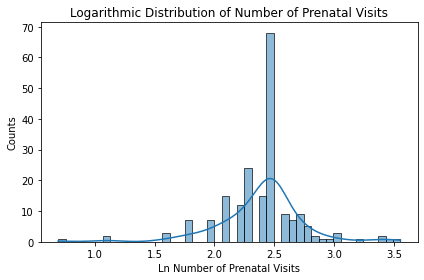

In [42]:
# Analysis of the Npvis feature

# Creating an adiitional logarithmic feature
data['log_npvis'] = np.log(data['npvis'])

# Developing a histogram
sns.histplot(x = 'log_npvis',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Logarithmic Distribution of Number of Prenatal Visits")
plt.xlabel(xlabel = "Ln Number of Prenatal Visits")
plt.ylabel(ylabel = "Counts")

# Displaying the chart
plt.tight_layout()
plt.show()

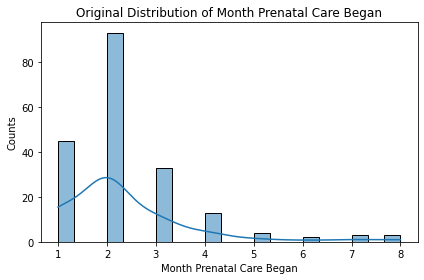

In [43]:
# Analysis of Month Prenatal Care Began

# Creating additional features using monpre as a base
data['log_monpre'] = np.log(data['monpre'])
data['log10_monpre'] = np.log10(data['monpre'])
data['div_monpre'] = (1/data['monpre'])

# Developing a histogram
sns.histplot(x = 'monpre',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Original Distribution of Month Prenatal Care Began")
plt.xlabel(xlabel = "Month Prenatal Care Began")
plt.ylabel(ylabel = "Counts")

# Displaying the chart
plt.tight_layout()
plt.show()

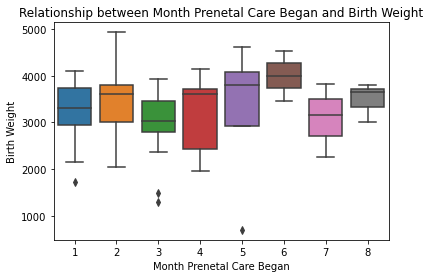

In [44]:
# Analysis of the Monpre and Birth Weight
# developing a boxplot
sns.boxplot(x    = 'monpre',
            y    = 'bwght',
            data = data)

# titles and labels
plt.title(label   = 'Relationship between Month Prenetal Care Began and Birth Weight')
plt.xlabel(xlabel = 'Month Prenetal Care Began')
plt.ylabel(ylabel = 'Birth Weight')

# displaying the plot
plt.tight_layout
plt.show()

In [45]:
# Creating an interaction variable, describing the frequency of prenatal visits 
# Number of months between prenatal visits:
# -if high, it could describe a highly risked pregnancy,
# -if low, it could describe that parents not paying much attention to the pregnancy
data['frequency_of_visits_sq'] = (((9 - data['monpre']) / data['npvis']) ** 2).round(decimals = 2)
data['frequency_of_visits'] = (((9 - data['monpre']) / data['npvis'])).round(decimals = 2)


data.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mage_x_mage_rev_48,mage_x_mage_rev_49,mage_x_mage_rev_50,mage_x_mage_rev_51,log_npvis,log_monpre,log10_monpre,div_monpre,frequency_of_visits_sq,frequency_of_visits
0,69,14.0,5,2.0,62,14.0,4,7,23,9,...,69,69,69,69,0.693147,1.609438,0.698970,0.200000,4.00,2.00
1,68,12.0,3,10.0,61,11.0,4,6,25,11,...,68,68,68,68,2.302585,1.098612,0.477121,0.333333,0.36,0.60
2,71,12.0,3,6.0,46,12.0,2,7,21,12,...,71,71,71,71,1.791759,1.098612,0.477121,0.333333,1.00,1.00
3,59,16.0,1,8.0,48,16.0,7,8,21,10,...,59,59,59,59,2.079442,0.000000,0.000000,1.000000,1.00,1.00
4,48,12.0,4,6.0,39,12.0,2,9,17,13,...,48,0,0,0,1.791759,1.386294,0.602060,0.250000,0.69,0.83


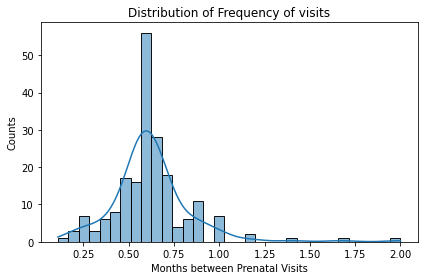

In [46]:
# Analysis of the created interaction variable - Frequency of visits (npvis/monpre)
# Developing the histplot
sns.histplot(x = 'frequency_of_visits',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Distribution of Frequency of visits")
plt.xlabel(xlabel = "Months between Prenatal Visits")
plt.ylabel(ylabel = "Counts")

# Displaying the chart
plt.tight_layout()
plt.show()

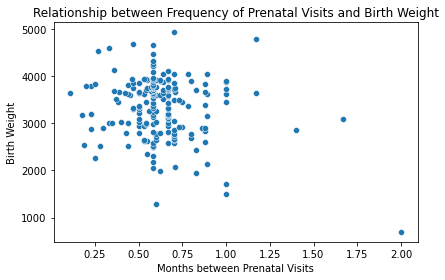

In [47]:
# Analysis of the relationship between frequency of visits and birth weight
# Developing the scatterplot
sns.scatterplot(x = 'frequency_of_visits',
               y = 'bwght',
               data = data)

# Title and labels
plt.title(label = "Relationship between Frequency of Prenatal Visits and Birth Weight")
plt.xlabel(xlabel = "Months between Prenatal Visits")
plt.ylabel(ylabel = "Birth Weight")

# Displaying the chart
plt.tight_layout()
plt.show()

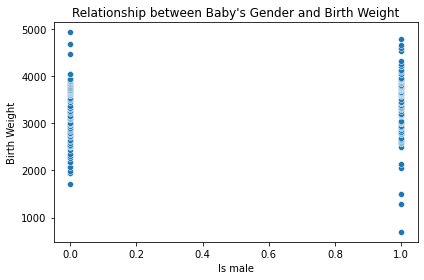

In [48]:
# Analysis of Male feature (Categorical Data)

# Developing a scatterplot
sns.scatterplot(x = 'male',
                y = 'bwght',
                data = data)

# Title and labels
plt.title(label = "Relationship between Baby's Gender and Birth Weight")
plt.xlabel(xlabel = "Is male")
plt.ylabel(ylabel = "Birth Weight")

# Displaying the chart
plt.tight_layout()
plt.show()

In [49]:
# Creating a interaction feature: male * mother's age
data['male_x_mage'] = data['male'] * data['mage']

# Checking the size of strata
print(f"""
The number of women which have girl:         {data.loc[:, 'male_x_mage'][data.loc[:, 'male_x_mage'] == 0].value_counts().sum()} 
The number of women which have boys (x age): {data.loc[:, 'male_x_mage'][data.loc[:, 'male_x_mage'] != 0].value_counts().sum()}""")


The number of women which have girl:         88 
The number of women which have boys (x age): 108


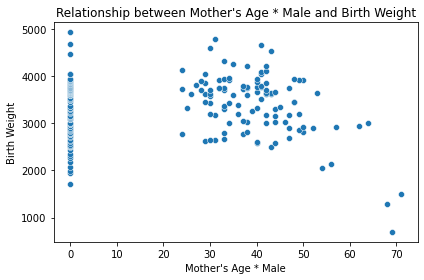

In [50]:
# Developing a scatterplot for relationship btw created interaction variable and birth weight
sns.scatterplot(x = 'male_x_mage',
                y = 'bwght',
                data = data)

# Title and labels
plt.title(label = "Relationship between Mother's Age * Male and Birth Weight")
plt.xlabel(xlabel = "Mother's Age * Male")
plt.ylabel(ylabel = "Birth Weight")

# Displaying the chart
plt.tight_layout()
plt.show()

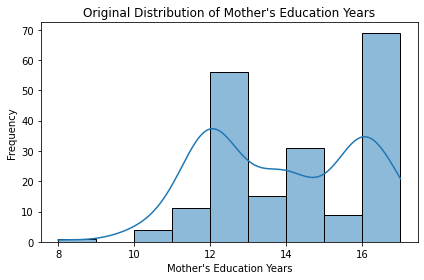

In [51]:
# Analysis of Mother's Education

# Developing a histogram
sns.histplot(x = 'meduc',
             data = data,
             kde = True)

# Title and labels
plt.title(label = "Original Distribution of Mother's Education Years")
plt.xlabel(xlabel = "Mother's Education Years")
plt.ylabel(ylabel = "Frequency")

# Displaying the chart
plt.tight_layout()
plt.show()

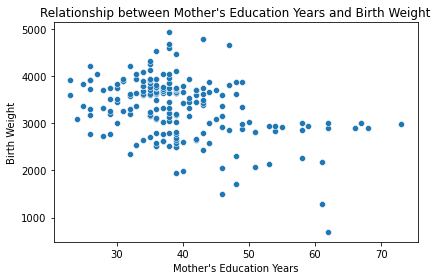

In [52]:
# Developing a scatterplot
sns.scatterplot(x = 'fage',
                y = 'bwght',
                data = data)

# Title and labels
plt.title(label = "Relationship between Mother's Education Years and Birth Weight")
plt.xlabel(xlabel = "Mother's Education Years")
plt.ylabel(ylabel = "Birth Weight")

# Displaying the chart
plt.tight_layout()
plt.show()

In [53]:
# Creating supporting features describing the race of a family
data['famwhte'] = data['mwhte'] * data['fwhte'] # if white
data['famblck'] = data['mblck'] * data['fblck'] # if black
data['famoth'] = data['moth'] * data['foth'] # if other

# Creating supporting feature for education (min, max, mean for family)
data['max_edu'] = list(map(max, data['meduc'], data['feduc'])) # max education years for family
data['min_edu'] = list(map(min, data['meduc'], data['feduc'])) # min education years for family
data['edu_av'] = (data['max_edu'] - data['min_edu'])/2 # average education years

# Feature describing average education in family with black mother and father
data['edu_av_famblck'] = data['edu_av'] * data['famblck']

# Feature describing cigarettes per day in different race families
data['cigs_famwhte'] = data['cigs'] * data['famwhte'] # for white family
data['cigs_famoth'] = data['cigs'] * data['famoth'] # for other race family
data['cigs_famblck'] = data['cigs'] * data['famblck'] # for black family

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part IV | Best Model</h3><br>

Having received the necessary data and changed variables, we can select a better model with higher forecasting accuracy. At the same time, the gap between the testing and training datasets will be less than 5%.<br><br>

The following models were chosen for the study: simple regression (OLS), Lasso regression, KNN - K-nearest Neighbors Regression, and ADR - Automatic Relevance Determination Regression.<br><br>

Based on the analysis results, the classic simple regression - <strong>OLS - was chosen</strong> because it showed a more accurate prediction than other models. At the same time, the gap was less than 5%. A significant advantage of this model is the ability to interpret the results.

<pre>
Chosen Model      Model      Test Score      Train Score      Train-Test Gap 
------------      -----      -----------      ----------      --------------
Final Model ==>   OLS        0.7506           0.7106          0.04
                  Lasso      0.7497           0.7105          0.0392
                  ARD        0.7415           0.7078          0.0337
                  KNN        0.5378           0.591           0.0532
</pre>
<br>

So, the key features and coefficients that were included in the model are:<br>

- cigarettes: <strong>-30 gr</strong> for each cigarette <br>
- drinks: <strong>-130 gr</strong> for each cup<br>
- frequency of visits: <strong>1030 gr</strong> starting point before traffic becomes more frequent 22 days between visits<br>
- frequency of visits^2: <strong>-740 gr</strong> decreasing factor in case of too frequent attendance<br>
- father's age more 42: <strong>6 gr</strong> - a combination of factors: age - the older, the more risks, and conditions - the richer, the lower the risks<br>
- average education years in black family: <strong>48 gr</strong><br> 
- average cigarettes per day in white family: <strong>-5 gr</strong> for each cigarette<br> 
- average cigarettes per day in other race family: <strong>-3 gr</strong> for each cigarette <br>

In [54]:
# Importing the package
import statsmodels.formula.api as smf

# Building a model
lm_best = smf.ols(formula =  """bwght ~   cigs 
                                        + drink
                                        + frequency_of_visits
                                        + frequency_of_visits_sq
                                        + fage_x_fage42
                                        + edu_av_famblck
                                        + cigs_famwhte
                                        + cigs_famoth
                                        """,
                                data = data)


# Fitting the model
results = lm_best.fit()

# Analazyng output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     60.34
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           8.63e-48
Time:                        19:43:01   Log-Likelihood:                -1421.1
No. Observations:                 196   AIC:                             2860.
Df Residuals:                     187   BIC:                             2890.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3897

In [55]:
# Creating a dataset with choosen features
X = data.loc[:, ['cigs', 
                 'drink', 
                 'frequency_of_visits', 
                 'frequency_of_visits_sq', 
                 'fage_x_fage42', 
                 'edu_av_famblck', 
                 'cigs_famwhte', 
                 'cigs_famoth']]

# Creating a dataset with y-variable only
y = data.loc[:, ['bwght']]

# Checking the result in a readable way
print(f""" 
The shape of independent variables (x-variables): {X.shape[:]}
The shape of dependent variable (y-variable):     {y.shape[:]}""")

# Splitting the dataset to training and testing sets, random seed is 219, and test size is 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 219)

 
The shape of independent variables (x-variables): (196, 8)
The shape of dependent variable (y-variable):     (196, 1)


In [56]:
# Developing an R^2 outcome out of OLS

# Installing the OLS package
from sklearn.linear_model import LinearRegression

# Instantiating an OLS model base
reg = LinearRegression()

# Fitting a Regression with training set
reg_fit = reg.fit(X_train, y_train)

# Calculating the predicted y-variable based on testing set by x-variables
reg_pred = reg_fit.predict(X_test)

# Printing the calculated R^2 for training the testing sets
print('OLS Training Score :', abs(reg.score(X_train, y_train).round(4)))
print('OLS Testing Score  :', abs(reg.score(X_test, y_test).round(4)))

# Saving variables with scores for further use
OLS_train_score = abs(reg.score(X_train, y_train).round(4))
OLS_test_score = abs(reg.score(X_test, y_test).round(4))

# Calculating the gap of R^2 between training and testing sets
print('OLS Train-Test Gap :', abs(reg.score(X_train, y_train) - reg.score(X_test, y_test)).round(4))
reg_test_gap = abs(reg.score(X_train, y_train) - reg.score(X_test, y_test)).round(4)

# DELETE AFTER
if reg_test_gap <= 0.05:
    gapOLS = 0
else:
    gapOLS = reg_test_gap - 0.05
    
final_score = abs(reg.score(X_test, y_test).round(4)) - gapOLS
print('Final Score: ', (final_score * 100).round(2))

OLS Training Score : 0.7106
OLS Testing Score  : 0.7506
OLS Train-Test Gap : 0.04
Final Score:  75.06


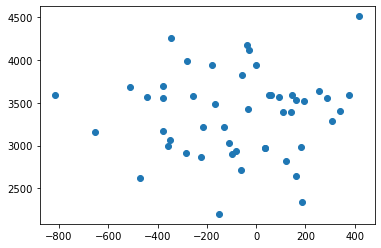

In [57]:
residuals = y_test - reg_pred

plt.scatter(residuals, reg_pred)

plt.show()

In [58]:
# Developing an R^2 outcome out of Lasso Regression

# Installing the Lasso Regression package
from sklearn.linear_model import Lasso

# Instantiating the Lasso Regression base
lasso = Lasso(alpha = 0.1, normalize = True)

# Fitting a Lasso Regression with training set
lasso_fit = lasso.fit(X_train, y_train)

# Predicting the y-variable based on features testing set
lasso_predict = lasso.predict(X_test)

# Printing the calculated R^2 for training the testing sets
print('Lasso Training Score :', abs(lasso.score(X_train, y_train).round(4)))
print('Lasso Testing Score  :', abs(lasso.score(X_test, y_test).round(4)))

# Saving variables with scores for further use
LASSO_train_score = abs(lasso.score(X_train, y_train).round(4))
LASSO_test_score = abs(lasso.score(X_test, y_test).round(4))

# Calculating the gap of R^2 between training and testing sets
print('Lasso Train-Test Gap :', abs(lasso.score(X_train, y_train) - lasso.score(X_test, y_test)).round(4))
lasso_test_gap = abs(lasso.score(X_train, y_train) - lasso.score(X_test, y_test)).round(4)

if lasso_test_gap <= 0.05:
    gapLASSO = 0
else:
    gapLASSO = lasso_test_gap - 0.05

final_score = abs(lasso.score(X_test, y_test).round(4)) - gapLASSO
print('Final Score: ', (final_score * 100).round(2))

Lasso Training Score : 0.7105
Lasso Testing Score  : 0.7497
Lasso Train-Test Gap : 0.0392
Final Score:  74.97


In [59]:
# Developing an R^2 outcome out of ARD Regression

# Installing the ARD Regression package
from sklearn.linear_model import ARDRegression

# Instantiating an ARD Regression base
ard = ARDRegression()

# Fitting a ARD Regression created with training set
ard_fit = ard.fit(X_train, y_train)

# Predicting the y-variable based on features testing test
ard_predict = ard.predict(X_test)

# Printing the calculated R^2 for training and testing sets
print('ARD Training Score :', abs(ard.score(X_train, y_train).round(4)))
print('ARD Testing Score  :', abs(ard.score(X_test, y_test).round(4)))

# Saving variables with scores for further use
ARD_train_score = abs(ard.score(X_train, y_train).round(4))
ARD_test_score = abs(ard.score(X_test, y_test).round(4))

# Calculating the gap of R^2 between training and testing sets
print('ARD Train-Test Gap :', abs(ard.score(X_train, y_train) - ard.score(X_test, y_test)).round(4))
ard_test_gap = abs(ard.score(X_train, y_train) - ard.score(X_test, y_test)).round(4)

if ard_test_gap <= 0.05:
    gapARD = 0
else:
    gapARD = ard_test_gap - 0.05

final_score = abs(ard.score(X_test, y_test).round(4)) - gapARD
print('Final Score: ', (final_score * 100).round(2))

ARD Training Score : 0.7078
ARD Testing Score  : 0.7415
ARD Train-Test Gap : 0.0337
Final Score:  74.15


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [60]:
# Developing a KNN model with R^2 as an outcome

# Importing packages for KNN model and Standardization
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Standardization of features

# Instantiating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler with features dataset
scaler.fit(X)

# Transforming the data after fit
X_scaled = scaler.transform(X)

# Converting the transformed data to the DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# Checking the result
X_scaled_df.describe().round(decimals = 2)


,0,1,2,3,4,5,6,7
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.80,-1.80,-2.31,-1.08,-1.50,-0.42,-0.52,-0.56
25%,-0.81,-0.47,-0.42,-0.40,-1.50,-0.42,-0.52,-0.56
50%,0.01,-0.13,-0.20,-0.24,0.52,-0.42,-0.52,-0.56
75%,0.71,0.62,0.34,0.13,0.77,-0.42,-0.35,0.18
max,2.31,2.87,6.19,9.00,1.01,4.78,3.76,3.14


In [61]:
# Splitting the scaled dataset into training and testing sets with 25% of testing set and random seed of 219
X_train_std, X_test_std, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.25, random_state = 219)

# Instantiating the KNN model
knn_reg = KNeighborsRegressor(algorithm = 'auto', n_neighbors =6)

# Fitting the KNN model with training set with standardized features
knn_reg.fit(X_train_std, y_train)

# Predicting based on testing standardized features testing set
knn_reg.predict(X_test_std)

# Scoring the results
print('KNN Training Score:', knn_reg.score(X_train_std, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(X_test_std, y_test).round(4))

# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train_std, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test_std, y_test).round(4)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

if knn_reg_test_gap <= 0.05:
    gapKNN = 0
else:
    gapKNN = knn_reg_test_gap - 0.05
    
final_score = abs(knn_reg_score_test) - gapKNN
print('Final Score: ', (final_score * 100).round(2))

KNN Training Score: 0.591
KNN Testing Score : 0.5378
KNN Train-Test Gap: 0.0532
Final Score:  53.46


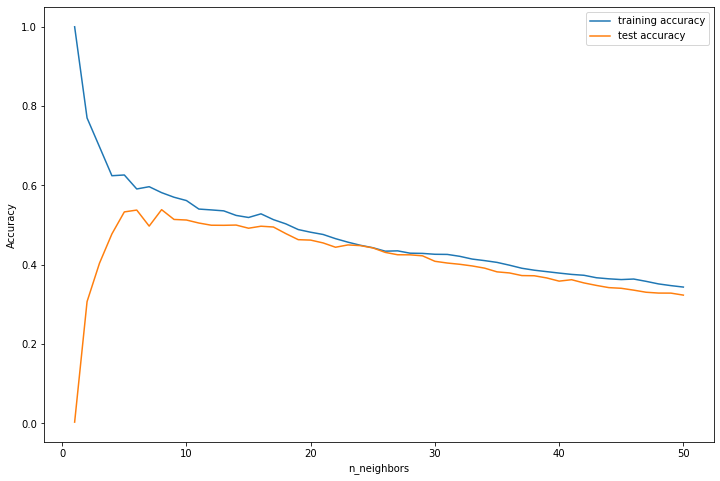

In [62]:
# Source: Professor Chase Kusterer's Class Materials - Script 5 - KNN and Distance Standardization

# Creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# Building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_std, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_std, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_std, y_test))


# Plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [63]:
# comparing results

print(f"""
Chosen Model      Model      Test Score      Train Score      Train-Test Gap 
------------      -----      -----------      ----------      --------------
Final Model ==>   OLS        {OLS_test_score}           {OLS_train_score}          {reg_test_gap}
                  Lasso      {LASSO_test_score}           {LASSO_train_score}          {lasso_test_gap}
                  ARD        {ARD_test_score}           {ARD_train_score}          {ard_test_gap}
                  KNN        {knn_reg_score_test}           {knn_reg_score_train}           {knn_reg_test_gap}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [OLS_train_score, LASSO_train_score,
                                   ARD_train_score],
           
    'Testing'  : [OLS_test_score, LASSO_test_score,
                                   ARD_test_score],
                    
    'Train-Test Gap' : [reg_test_gap, lasso_test_gap,
                                        ard_test_gap]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)


Chosen Model      Model      Test Score      Train Score      Train-Test Gap 
------------      -----      -----------      ----------      --------------
Final Model ==>   OLS        0.7506           0.7106          0.04
                  Lasso      0.7497           0.7105          0.0392
                  ARD        0.7415           0.7078          0.0337
                  KNN        0.5378           0.591           0.0532

